### Happiness Classifier EDA and Model Training
[Kaggle Dataset - happydata.csv](https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset)

infoavail = the availability of information about the city services  
housecost = the cost of housing  
schoolquality = the overall quality of public schools  
policetrust = your trust in the local police  
streetquality = the maintenance of streets and sidewalks  
events = the availability of social community events  
happy = decision attribute (D) with values 0 (unhappy) and 1 (happy)  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error

In [2]:
data = pd.read_csv('data.csv')
data.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [4]:
data.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


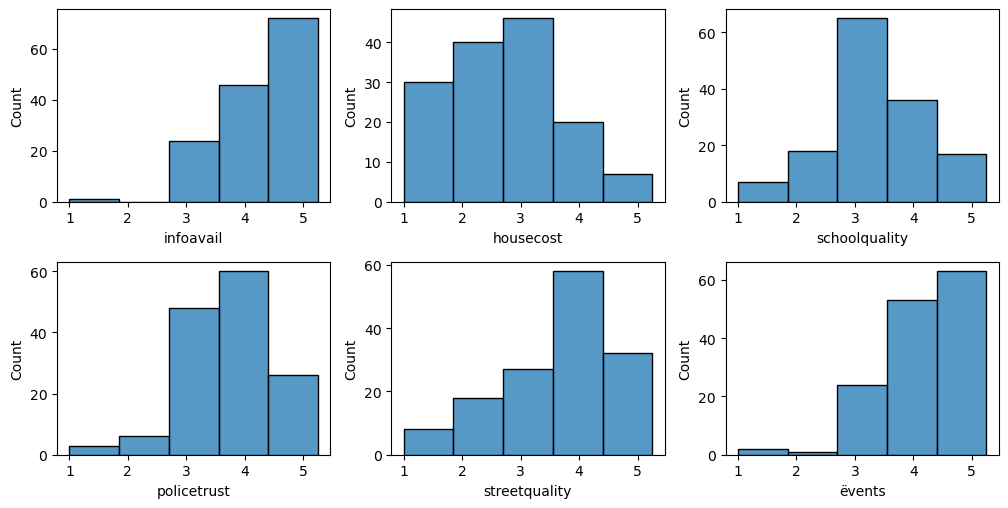

In [17]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()

for k,v in data.drop('happy', axis=1).items():
    sns.histplot(x=k, data=data, ax=axs[index], bins=5, binwidth=0.85)
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)

<AxesSubplot: >

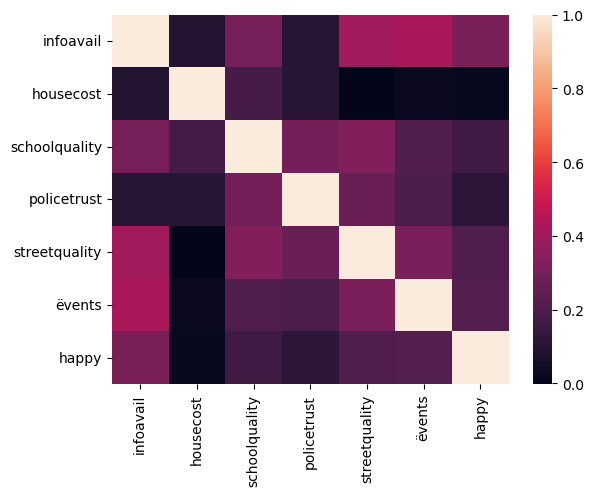

In [27]:
sns.heatmap(data.corr())

In [28]:
X = data.drop('happy', axis=1)
y = data[['happy']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(114, 6) (29, 6) (114, 1) (29, 1)


In [30]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

A:\Applications\Anaconda\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [31]:
nb_model.predict([[3, 3, 3, 4, 2, 4]])

A:\Applications\Anaconda\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [32]:
y_pred = nb_model.predict(X_test)

print(f'''
Accuracy : {accuracy_score(y_test, y_pred)*100} %
Precision : {precision_score(y_test, y_pred)*100} %
Recall : {recall_score(y_test, y_pred)}
Mean Square Error : {mean_squared_error(y_test, y_pred)}
''')


Accuracy : 51.724137931034484 %
Precision : 52.63157894736842 %
Recall : 0.6666666666666666
Mean Square Error : 0.4827586206896552



In [33]:
lin_model = LogisticRegression()
lin_model.fit(X_train, y_train)

A:\Applications\Anaconda\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
lin_model.predict([[3, 3, 3, 4, 2, 4]])

A:\Applications\Anaconda\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [35]:
y_pred = lin_model.predict(X_test)

print(f'''
Accuracy : {accuracy_score(y_test, y_pred)*100} %
Precision : {precision_score(y_test, y_pred)*100} %
Recall : {recall_score(y_test, y_pred)}
Mean Square Error : {mean_squared_error(y_test, y_pred)}
''')


Accuracy : 55.172413793103445 %
Precision : 55.00000000000001 %
Recall : 0.7333333333333333
Mean Square Error : 0.4482758620689655

